# reliant webscrape

In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.support.ui as ui
import selenium.webdriver as webdriver
from selenium.webdriver import Chrome
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import reliant_scrape as rs
import pandas as pd
import numpy as np
import selenium
import html5lib
import time
import yaml
import json
import os

print('imported modules.')

imported modules.


## initialize browser

In [2]:
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader = yaml.FullLoader)

output = rs.logon(config['headless'], config['download'], config['site'], config['creds'])
print('logged on successfully.')

time.sleep(10)

logged on successfully.


## scrape user info

In [3]:
amt, name, acct, address = rs.acct_info(output)

print('current bill is ${}.'.format(amt))
print('service for {}, account {} at {}.'.format(name, acct, address))

current bill is $0.0.
service for STEVEN HURWITT, account 17123855-3 at 2512 MILAM ST #5218, HOUSTON, TX 77006.


## view usage history

In [4]:
want_to = output.find_element_by_xpath("//select[@id='wantTo']")
options = [x for x in want_to.find_elements_by_tag_name('option')]
options_text = [x.text for x in want_to.find_elements_by_tag_name('option')]

Select(want_to).select_by_visible_text('View usage history')
time.sleep(5)

## get daily usage data

In [5]:
master = pd.DataFrame()

data, date, var = rs.get_daily_use(output)
start_date = date

try:
    var.find_element_by_id('nextid').click() #click to next day
    time.sleep(2)

except:
    print('out of days.')

while start_date < datetime.today():
    
    time.sleep(5)
    data, date, var = rs.get_daily_use(output)
    start_date += timedelta(days = 1)
    
    if data.shape[0] > 0:
        master = pd.concat([master, data], axis = 0)
    
    try:
        var.find_element_by_id('nextid').click() #click to next day
        time.sleep(2)

    except:
        print('out of days.')

September 20, 2020 had usage of 37.0 kWh and cost $4.47.
September 21, 2020 had usage of 39.4 kWh and cost $4.8.
September 22, 2020 had usage of 33.4 kWh and cost $4.08.
September 23, 2020 had usage of 33.6 kWh and cost $4.03.
September 24, 2020 had usage of 37.2 kWh and cost $4.49.
September 25, 2020 had usage of 0 kWh and cost $0.
out of days.
September 25, 2020 had usage of 0 kWh and cost $0.
out of days.


## write to .csv

In [6]:
base = os.getcwd()
date_string = datetime.strftime(datetime.today(), format = '%m%d%Y')
fname = 'daily_usage_' + date_string + '.csv'
filepath = os.path.join(base, 'data', fname)
master.to_csv(filepath)
print('wrote data to .csv')

wrote data to .csv


## plot

<AxesSubplot:xlabel='Date'>

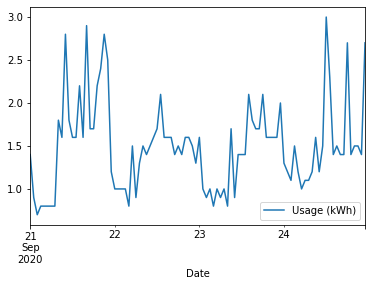

In [7]:
master.plot(y = 'Usage (kWh)')